# Problem 2

##  Machine learning for correlating boiling point information with chemical properties

In [4]:
# Importing the Required library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [5]:
df=pd.read_excel('data_file.xlsx') # Getting the Data from the current Directory
df.head()

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,1,(+)-a-pinene,136.23704,647.00,0.341,428.65
1,2,(+)-camphene,136.23704,638.00,0.296,432.65
2,3,(-)-a-pinene,136.23704,647.00,0.341,429.35
3,4,(-)-b-citronellol,156.26820,656.59,0.612,498.65
4,5,(-)-camphene,136.23704,638.00,0.296,439.95


## Part A

In [6]:
# Making the column vector
boiling_point=df['boiling point (K)']
molecular_weight=df['molweight']

R² value: 0.58


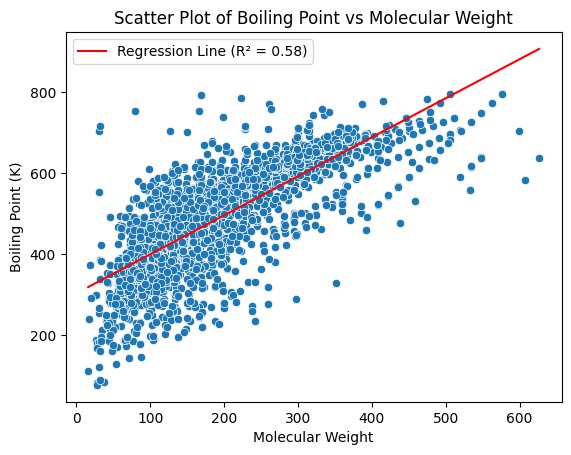

In [7]:
# Create a scatter plot
sns.scatterplot(x=molecular_weight, y=boiling_point)
plt.title('Scatter Plot of Boiling Point vs Molecular Weight')
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point (K)')

# Fit a regression line using linear regression
slope, intercept, r_value, p_value, std_err = linregress(molecular_weight, boiling_point)

# Plot the regression line
x_values = np.linspace(min(molecular_weight), max(molecular_weight), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.legend()

# Display the R² value
print(f'R² value: {r_value**2:.2f}')

plt.show()

## Part B

In [8]:
# Creating 100 Random Sample of the given data
df_sample = df.sample(n=100, random_state=42)
x_value=df_sample[['molweight','acentric factor']]
y_value=df_sample['boiling point (K)']/df_sample['critical temperature (K)']

In [17]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting the data to the model
model.fit(x_value, y_value)
# Getting the Coefficient
coefficients = model.coef_
# Getting the Bias
bias_term = model.intercept_
# Printing the Coeffient and Bias
print(f"Coefficients: {coefficients}, Bias term: {bias_term}")

# We can get the Quality of Coefficient by predicting the target values and Checking it's mean Error
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_value)
# Calculate mean squared error
mse = mean_squared_error(y_value, y_pred)
print("Mean Squared Error:", mse)

Coefficients: [0.00020187 0.15461602], Bias term: 0.5957965672017047
Mean Squared Error: 0.00044038679571403386


## Part C

### Develop of a neural network for Prediction

In [34]:
# Selecting the Training the data for the model
df_sample_neural_network_train = df.iloc[:600]
x_value_train=df_sample_neural_network_train[['molweight','acentric factor']]
y_value_train=df_sample_neural_network_train['boiling point (K)']/df_sample_neural_network_train['critical temperature (K)']

In [35]:
# Selecting the Validation set of data for the Neural Network
df_sample_neural_network_val = df.iloc[600:1800]
x_value_val=df_sample_neural_network_val[['molweight','acentric factor']]
y_value_val=df_sample_neural_network_val['boiling point (K)']/df_sample_neural_network_val['critical temperature (K)']

In [36]:
# Selecting the rest of the data as Test set
df_sample_neural_network_test = df.iloc[1800:]
x_value_test=df_sample_neural_network_test[['molweight','acentric factor']]
y_value_test=df_sample_neural_network_test['boiling point (K)']/df_sample_neural_network_test['critical temperature (K)']

In [37]:
# Buliding a Simple Neural Network with one dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_dim=x_value_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(x_value_train, y_value_train, epochs=100, batch_size=32, verbose=1,validation_data=(x_value_val, y_value_val))

# Evaluate the model
y_pred = model.predict(x_value_test)
mse = mean_squared_error(y_value_test, y_pred)

print("Mean Squared Error:", mse)

Epoch 1/100
19/19 [==============================] - 1s 30ms/step - loss: 1755.4098 - val_loss: 618.5211
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 918.2216 - val_loss: 292.4487
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 408.6618 - val_loss: 114.3448
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 151.6255 - val_loss: 34.9874
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 44.3493 - val_loss: 7.7329
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 9.4676 - val_loss: 1.1081
Epoch 7/100
19/19 [==============================] - 0s 12ms/step - loss: 1.6041 - val_loss: 0.1123
Epoch 8/100
19/19 [==============================] - 0s 14ms/step - loss: 0.2736 - val_loss: 0.1386
Epoch 9/100
19/19 [==============================] - 0s 16ms/step - loss: 0.1614 - val_loss: 0.1809
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 0.1598 -

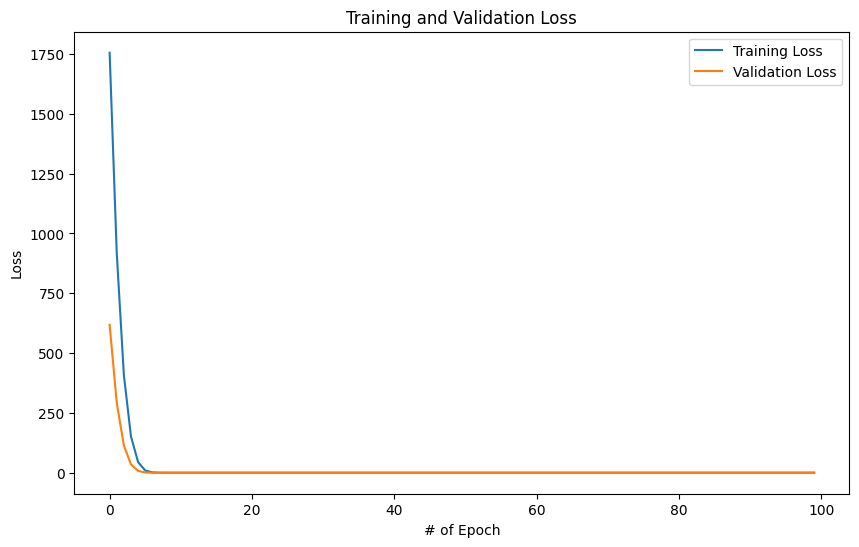

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('# of Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Now If we play around with the number of Layer

133/133 [==============================] - 0s 3ms/step
Mean Squared Error: 0.09945126488482238


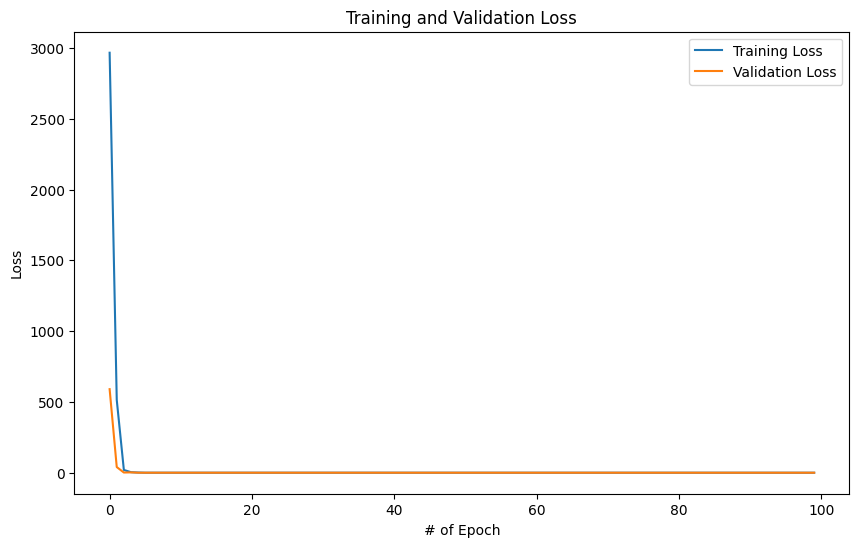

In [39]:
# Selecting the Training the data for the model
df_sample_neural_network_train = df.iloc[:600]
x_value_train=df_sample_neural_network_train[['molweight','acentric factor']]
y_value_train=df_sample_neural_network_train['boiling point (K)']/df_sample_neural_network_train['critical temperature (K)']

# Selecting the Validation set of data for the Neural Network
df_sample_neural_network_val = df.iloc[600:1800]
x_value_val=df_sample_neural_network_val[['molweight','acentric factor']]
y_value_val=df_sample_neural_network_val['boiling point (K)']/df_sample_neural_network_val['critical temperature (K)']

# Selecting the rest of the data as Test set
df_sample_neural_network_test = df.iloc[1800:]
x_value_test=df_sample_neural_network_test[['molweight','acentric factor']]
y_value_test=df_sample_neural_network_test['boiling point (K)']/df_sample_neural_network_test['critical temperature (K)']

# Buliding a Simple Neural Network with two dense layer
model = Sequential()
model.add(Dense(10, input_dim=x_value_train.shape[1], activation='relu'))
model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(x_value_train, y_value_train, epochs=100, batch_size=32, verbose=0,validation_data=(x_value_val, y_value_val))

# Evaluate the model
y_pred = model.predict(x_value_test)
mse = mean_squared_error(y_value_test, y_pred)

print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('# of Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

133/133 [==============================] - 1s 3ms/step
Mean Squared Error: 0.0009222603962489506


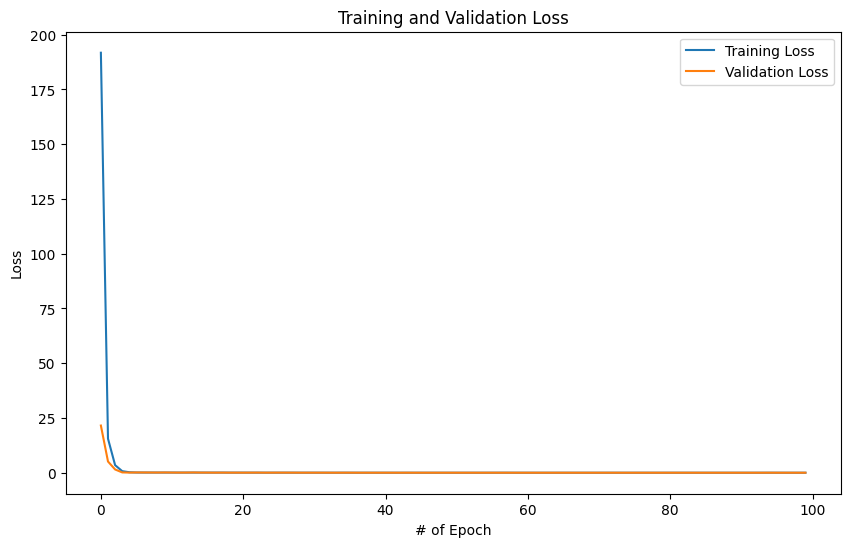

In [41]:
# Selecting the Training the data for the model
df_sample_neural_network_train = df.iloc[:600]
x_value_train=df_sample_neural_network_train[['molweight','acentric factor']]
y_value_train=df_sample_neural_network_train['boiling point (K)']/df_sample_neural_network_train['critical temperature (K)']

# Selecting the Validation set of data for the Neural Network
df_sample_neural_network_val = df.iloc[600:1800]
x_value_val=df_sample_neural_network_val[['molweight','acentric factor']]
y_value_val=df_sample_neural_network_val['boiling point (K)']/df_sample_neural_network_val['critical temperature (K)']

# Selecting the rest of the data as Test set
df_sample_neural_network_test = df.iloc[1800:]
x_value_test=df_sample_neural_network_test[['molweight','acentric factor']]
y_value_test=df_sample_neural_network_test['boiling point (K)']/df_sample_neural_network_test['critical temperature (K)']

# Buliding a Simple Neural Network with Three Dense dense layer
model = Sequential()
model.add(Dense(100, input_dim=x_value_train.shape[1], activation='relu'))
model.add(Dense(50, activation='linear'))
model.add(Dense(25, activation='linear'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(x_value_train, y_value_train, epochs=100, batch_size=32, verbose=0,validation_data=(x_value_val, y_value_val))

# Evaluate the model
y_pred = model.predict(x_value_test)
mse = mean_squared_error(y_value_test, y_pred)

print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('# of Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Testing configuration: Layers [100, 50, 25], Train size: 0.6, Validation size: 0.2
38/38 [==============================] - 0s 4ms/step
Mean Squared Error: 0.008067472574432513


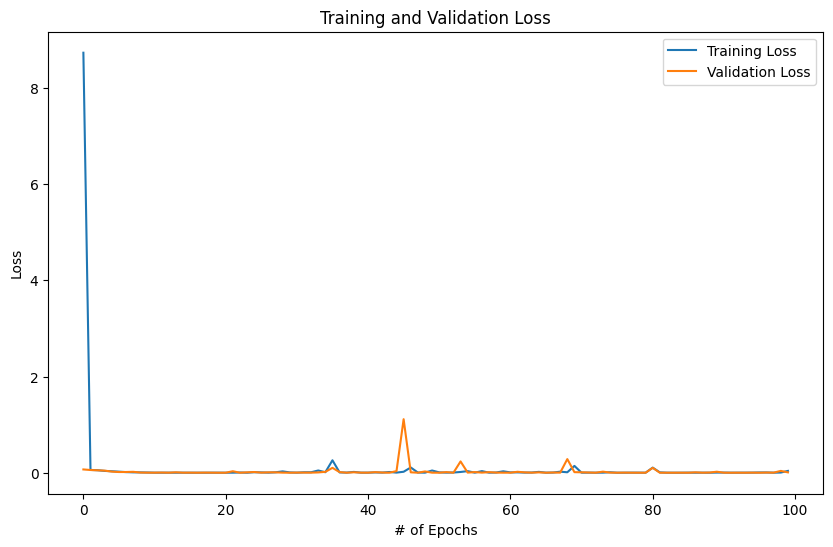

---------------------------------------------------
Testing configuration: Layers [100, 50, 25], Train size: 0.7, Validation size: 0.15
29/29 [==============================] - 0s 5ms/step
Mean Squared Error: 0.0005379224464173034


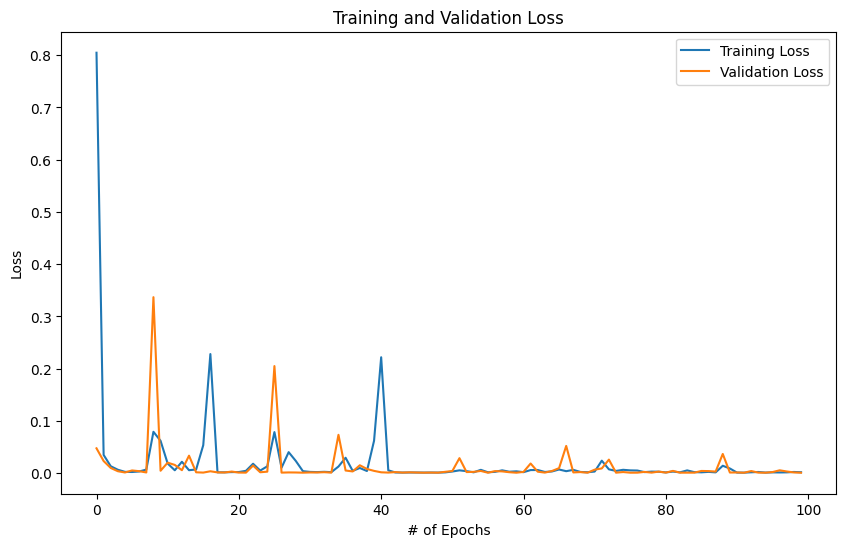

---------------------------------------------------
Testing configuration: Layers [100, 50, 25], Train size: 0.5, Validation size: 0.25
48/48 [==============================] - 0s 3ms/step
Mean Squared Error: 0.0032795414775002325


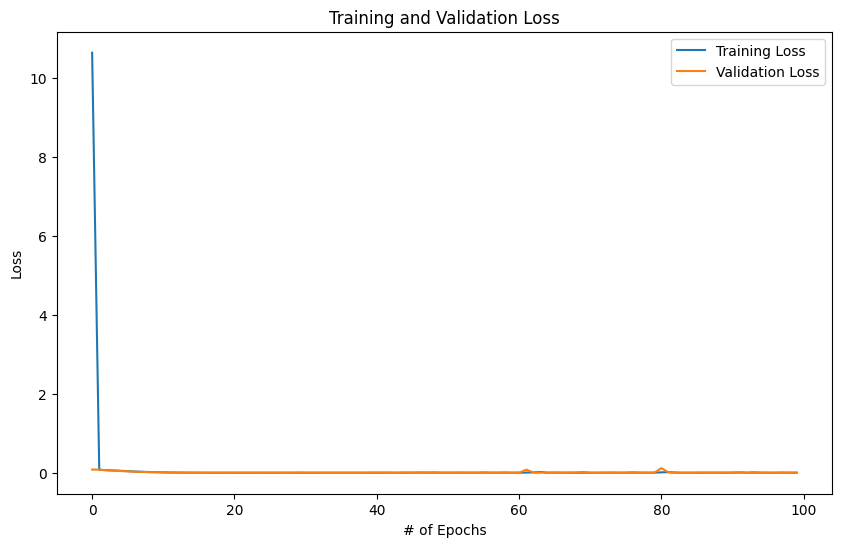

---------------------------------------------------
Testing configuration: Layers [100, 50, 25], Train size: 0.8, Validation size: 0.1
19/19 [==============================] - 0s 3ms/step
Mean Squared Error: 0.000551092669722202


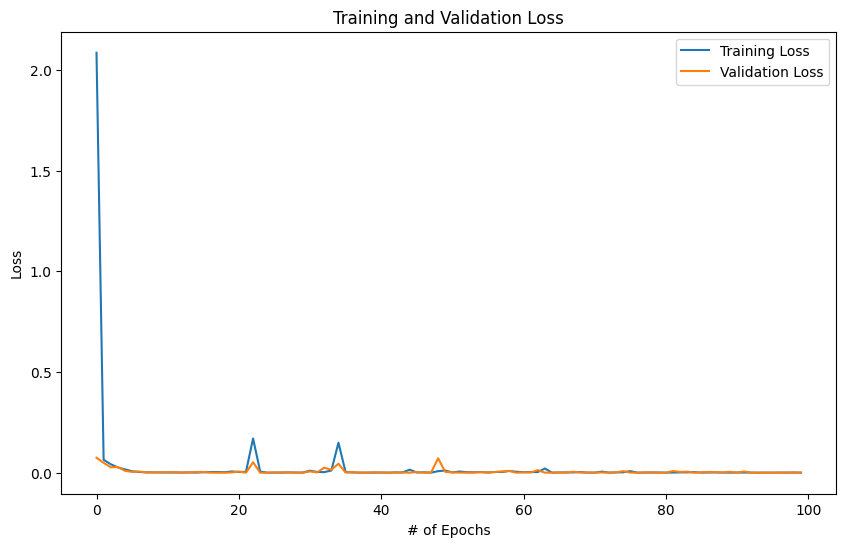

---------------------------------------------------
Testing configuration: Layers [50, 25], Train size: 0.6, Validation size: 0.2
38/38 [==============================] - 0s 4ms/step
Mean Squared Error: 0.000618845355764715


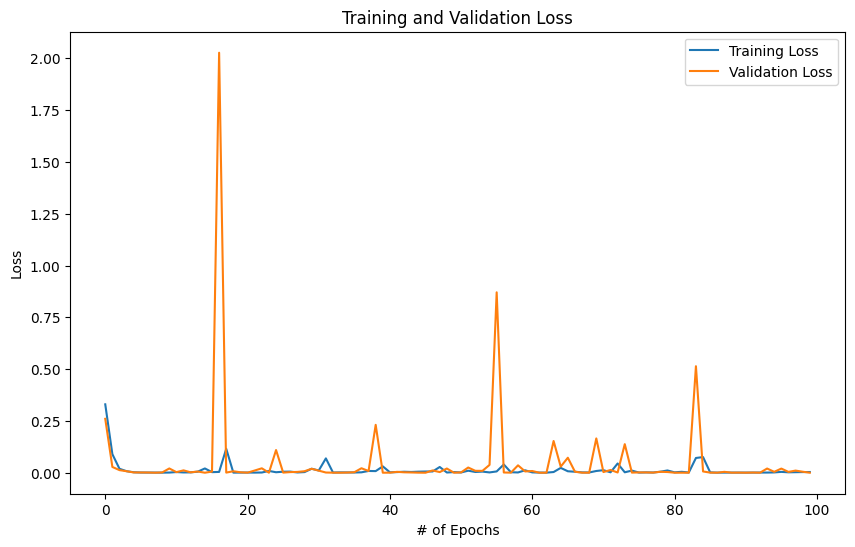

---------------------------------------------------
Testing configuration: Layers [50, 25], Train size: 0.7, Validation size: 0.15
29/29 [==============================] - 0s 3ms/step
Mean Squared Error: 0.003082403778923888


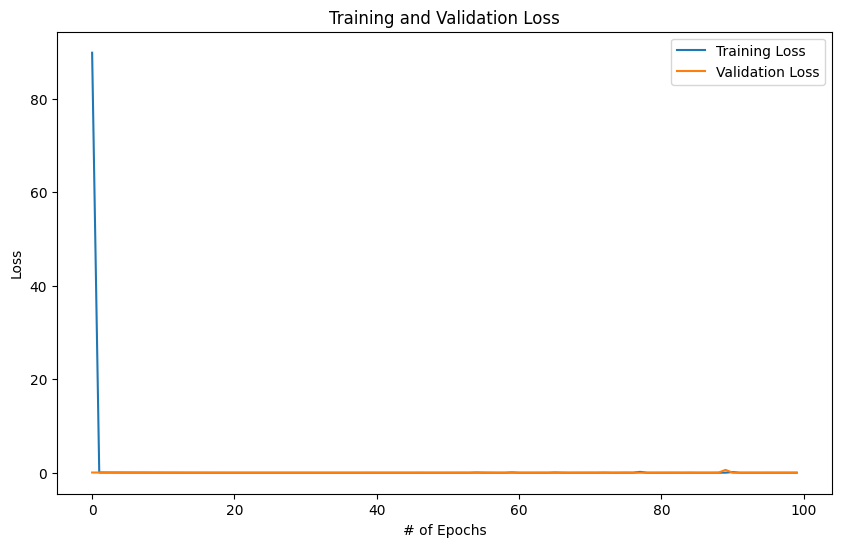

---------------------------------------------------
Testing configuration: Layers [50, 25], Train size: 0.5, Validation size: 0.25
48/48 [==============================] - 0s 3ms/step
Mean Squared Error: 0.08800650613363603


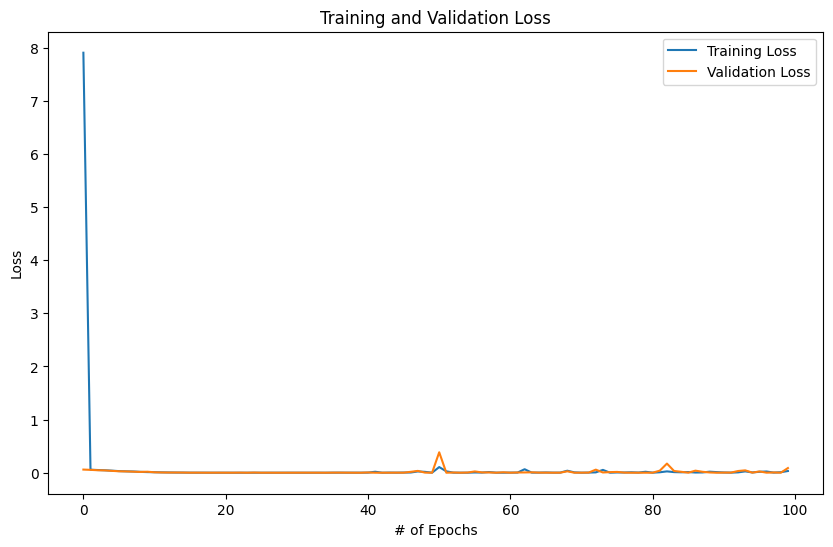

---------------------------------------------------
Testing configuration: Layers [50, 25], Train size: 0.8, Validation size: 0.1
19/19 [==============================] - 0s 3ms/step
Mean Squared Error: 0.0005986053606496154


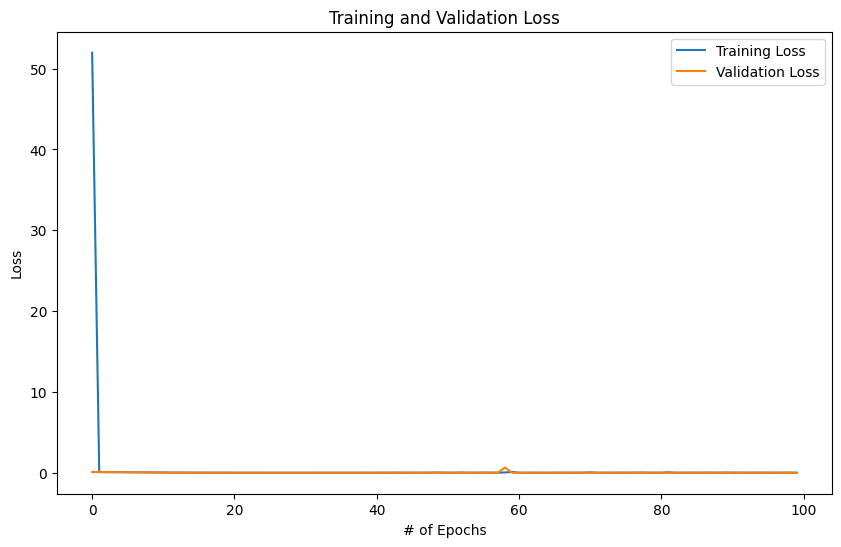

---------------------------------------------------
Testing configuration: Layers [100, 100, 50], Train size: 0.6, Validation size: 0.2
38/38 [==============================] - 0s 4ms/step
Mean Squared Error: 0.0011810961167778447


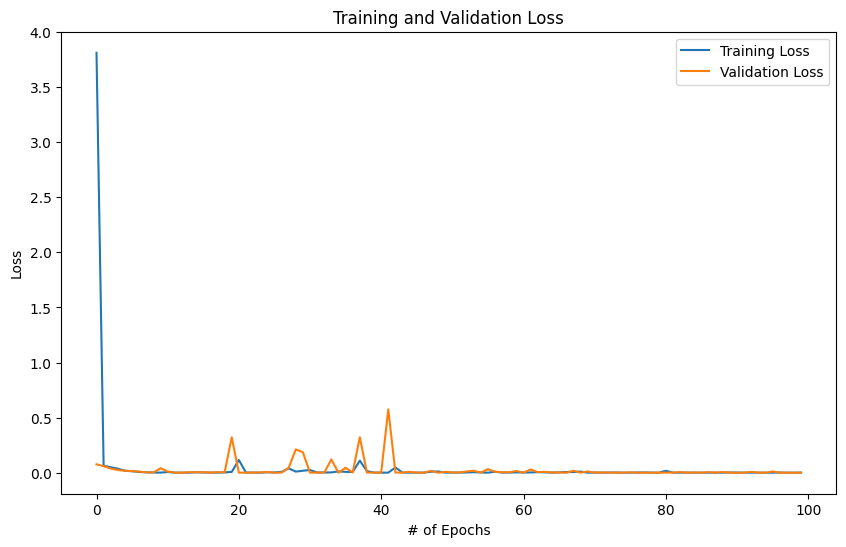

---------------------------------------------------
Testing configuration: Layers [100, 100, 50], Train size: 0.7, Validation size: 0.15
29/29 [==============================] - 0s 3ms/step
Mean Squared Error: 0.01404496170320864


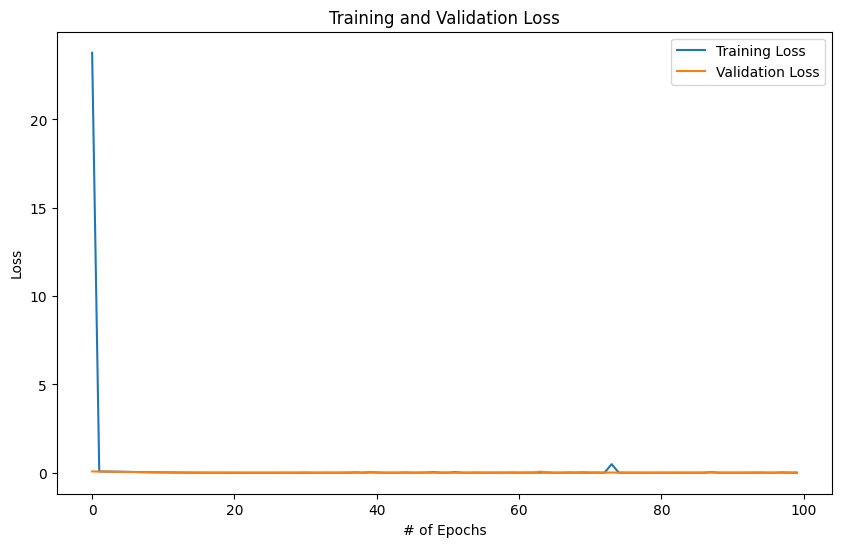

---------------------------------------------------
Testing configuration: Layers [100, 100, 50], Train size: 0.5, Validation size: 0.25
48/48 [==============================] - 0s 3ms/step
Mean Squared Error: 0.009361360852711


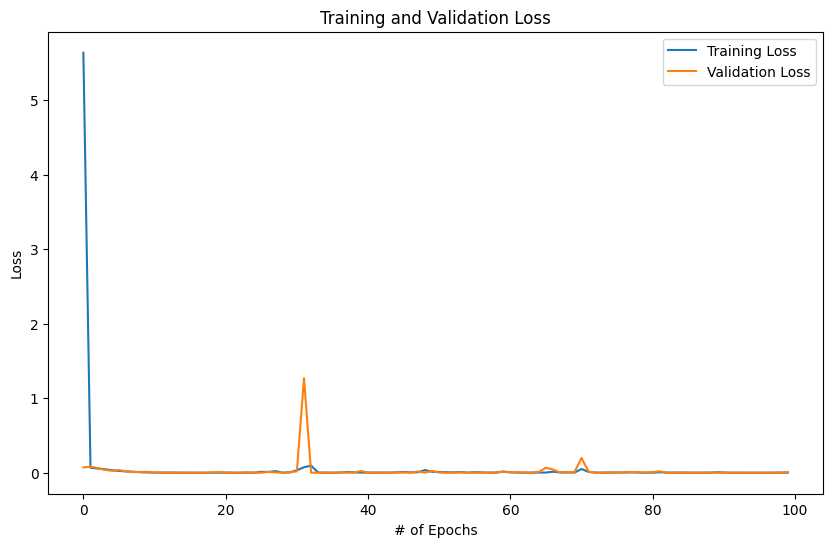

---------------------------------------------------
Testing configuration: Layers [100, 100, 50], Train size: 0.8, Validation size: 0.1
19/19 [==============================] - 0s 4ms/step
Mean Squared Error: 0.0034856231824105816


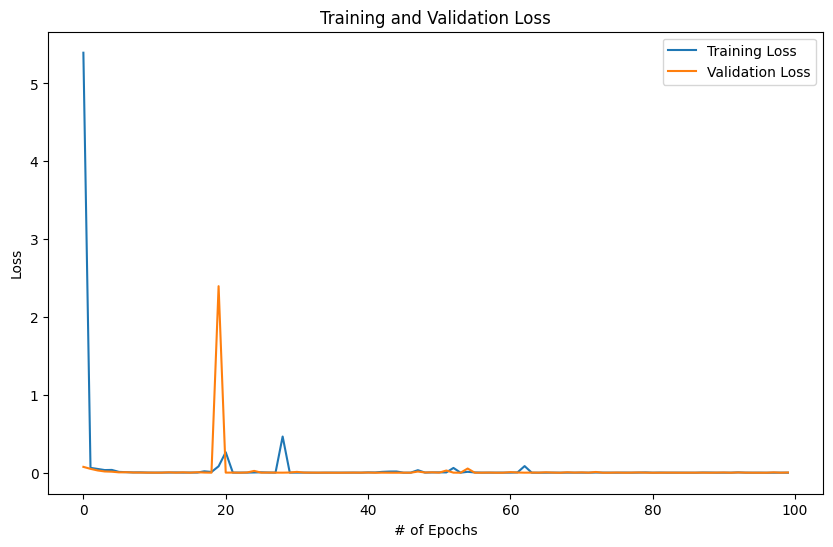

---------------------------------------------------
Testing configuration: Layers [100], Train size: 0.6, Validation size: 0.2
38/38 [==============================] - 0s 2ms/step
Mean Squared Error: 0.013115068105791515


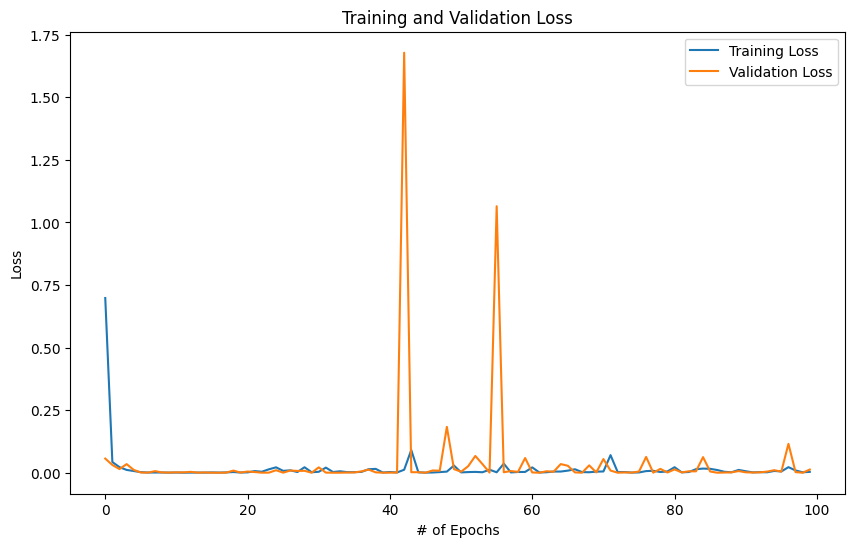

---------------------------------------------------
Testing configuration: Layers [100], Train size: 0.7, Validation size: 0.15
29/29 [==============================] - 0s 2ms/step
Mean Squared Error: 0.001505339810958811


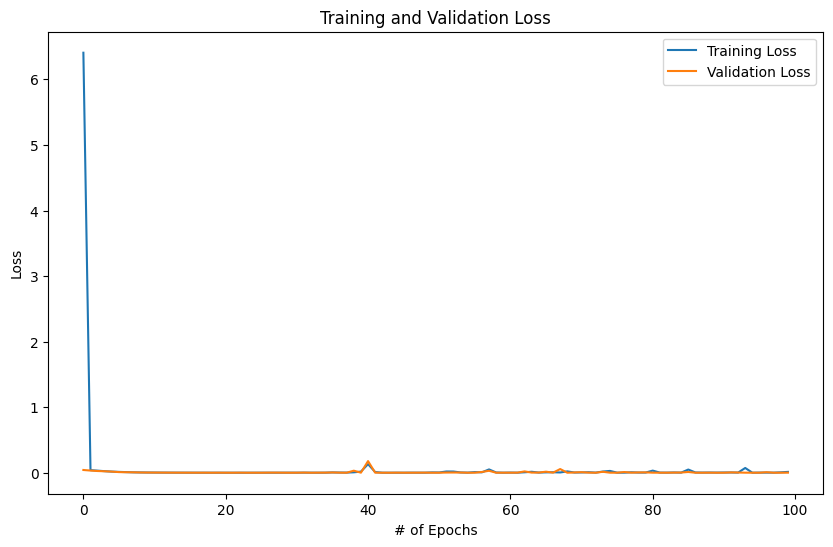

---------------------------------------------------
Testing configuration: Layers [100], Train size: 0.5, Validation size: 0.25
48/48 [==============================] - 0s 2ms/step
Mean Squared Error: 0.0022600210675136757


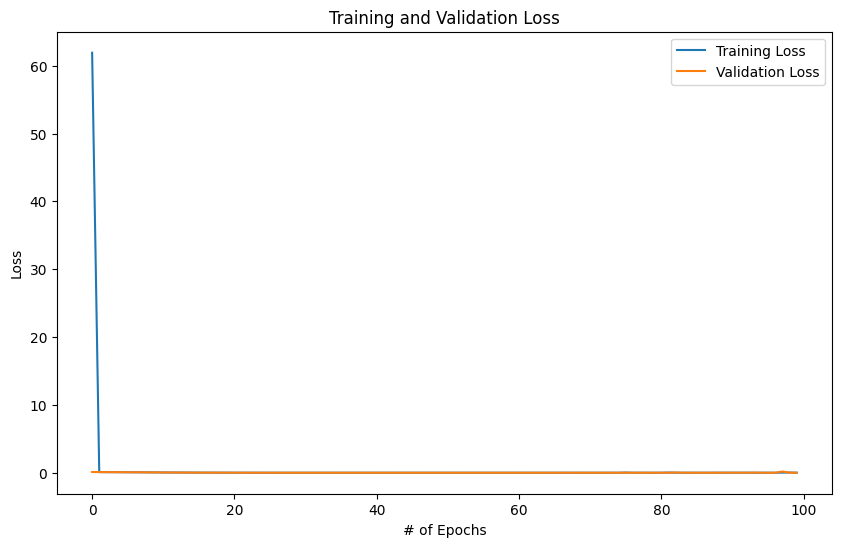

---------------------------------------------------
Testing configuration: Layers [100], Train size: 0.8, Validation size: 0.1
19/19 [==============================] - 0s 2ms/step
Mean Squared Error: 0.0006127015513310887


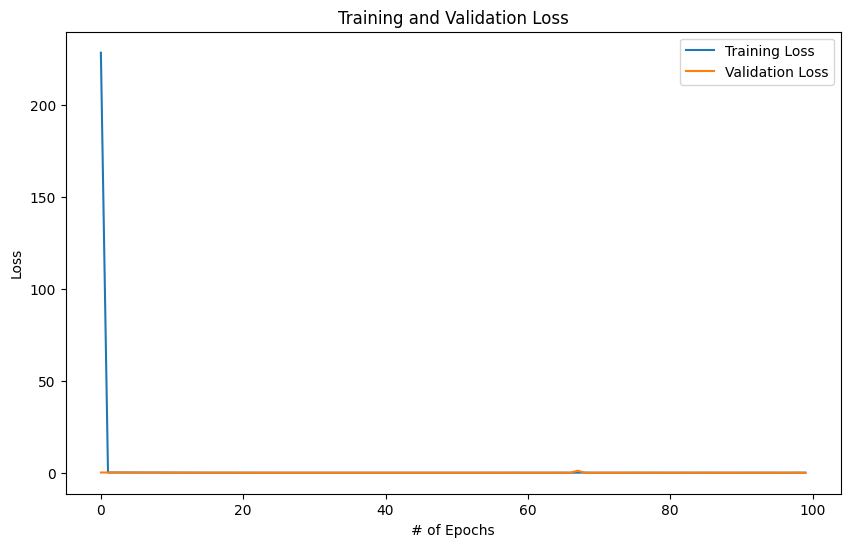

---------------------------------------------------


In [46]:
from sklearn.model_selection import train_test_split

def build_model(input_shape, layer_sizes):
    """
    Creates and compiles a neural network model.
    
    Parameters:
    - input_shape: The shape of the input data.
    - layer_sizes: A list of integers where each integer represents the number of neurons in a layer.
    
    Returns:
    - Compiled Keras model.
    """
    model = Sequential()
    model.add(Dense(layer_sizes[0], input_dim=input_shape, activation='relu'))
    for size in layer_sizes[1:]:
        model.add(Dense(size, activation='linear'))
    model.add(Dense(1, activation='relu'))  # Output layer
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def split_data(df, train_size, val_size):
    """
    Splits the data into training, validation, and test sets.
    
    Parameters:
    - df: DataFrame containing the data.
    - train_size: Proportion of the dataset to include in the train split.
    - val_size: Proportion of the dataset to include in the validation split.
    
    Returns:
    - x_train, y_train: Training data and labels.
    - x_val, y_val: Validation data and labels.
    - x_test, y_test: Test data and labels.
    """
    # Calculate the test size based on the remaining data after subtracting train and val sizes
    test_size = 1 - (train_size + val_size)
    
    # Splitting the data
    df_train_val, df_test = train_test_split(df, test_size=test_size, random_state=42)
    df_train, df_val = train_test_split(df_train_val, test_size=val_size/(train_size+val_size), random_state=42)  # Adjust val_size proportionally
    
    # Separating features and target variable
    x_train = df_train[['molweight', 'acentric factor']]
    y_train = df_train['boiling point (K)'] / df_train['critical temperature (K)']
    x_val = df_val[['molweight', 'acentric factor']]
    y_val = df_val['boiling point (K)'] / df_val['critical temperature (K)']
    x_test = df_test[['molweight', 'acentric factor']]
    y_test = df_test['boiling point (K)'] / df_test['critical temperature (K)']
    
    return x_train, y_train, x_val, y_val, x_test, y_test

def train_and_evaluate_model(df, layer_sizes, train_size, val_size, epochs=100, batch_size=32):
    """
    Trains and evaluates the model based on the provided parameters.
    
    Parameters:
    - df: DataFrame containing the data.
    - layer_sizes: List of layer sizes for the neural network.
    - train_size: Proportion of the dataset to include in the train split.
    - val_size: Proportion of the dataset to include in the validation split.
    - epochs: Number of epochs for training.
    - batch_size: Batch size for training.
    
    Prints the mean squared error on the test set and plots training and validation loss.
    """
    x_train, y_train, x_val, y_val, x_test, y_test = split_data(df, train_size, val_size)
    
    model = build_model(x_train.shape[1], layer_sizes)
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(x_val, y_val))
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('# of Epochs')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Define the configurations to test
layer_size_configurations = [
    [100, 50, 25],  # Original configuration
    [50, 25],       # Shallower network
    [100, 100, 50], # Deeper network
    [100]           # Very shallow network
]

data_split_configurations = [
    (0.6, 0.2),  # 60% training, 20% validation, 20% test
    (0.7, 0.15), # 70% training, 15% validation, 15% test
    (0.5, 0.25), # 50% training, 25% validation, 25% test
    (0.8, 0.1)   # 80% training, 10% validation, 10% test
]

# Loop over the configurations
for layer_sizes in layer_size_configurations:
    for train_size, val_size in data_split_configurations:
        print(f"Testing configuration: Layers {layer_sizes}, Train size: {train_size}, Validation size: {val_size}")
        train_and_evaluate_model(df, layer_sizes=layer_sizes, train_size=train_size, val_size=val_size, epochs=100, batch_size=32)
        print("---------------------------------------------------")